In [94]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.options.display.max_columns = None 
pd.set_option('display.max_rows', 500)
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,5) 


In [246]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [247]:
df = pd.read_csv("main_data.csv")

In [248]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,18-Nov,Channasandra,3 Bedroom,NaN,1200,3.0,1.0,67.77
1,Super built-up Area,Ready To Move,Kothanur,3 BHK,Gilleon,1820,3.0,3.0,77.00
2,Super built-up Area,Ready To Move,Banashankari,2 BHK,NaN,1040,2.0,3.0,45.00
3,Super built-up Area,18-Apr,Electronic City,3 BHK,Prarkun,1599,3.0,2.0,125.00
4,Built-up Area,Ready To Move,Kadugodi,3 BHK,MSingco,1260,2.0,2.0,54.00


In [249]:
df.shape

(9990, 9)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     9990 non-null   object 
 1   availability  9990 non-null   object 
 2   location      9990 non-null   object 
 3   size          9977 non-null   object 
 4   society       5883 non-null   object 
 5   total_sqft    9990 non-null   object 
 6   bath          9939 non-null   float64
 7   balcony       9530 non-null   float64
 8   price         9990 non-null   float64
dtypes: float64(3), object(6)
memory usage: 702.5+ KB


In [251]:
df["availability"].value_counts()

availability
Ready To Move           7906
18-Dec                   247
18-May                   219
18-Apr                   192
18-Aug                   157
19-Dec                   129
18-Jul                   114
18-Mar                   108
18-Jun                    75
20-Dec                    74
19-Mar                    71
21-Dec                    65
18-Feb                    51
18-Jan                    36
18-Nov                    35
19-Jan                    34
18-Sep                    29
17-Dec                    28
19-Jul                    27
19-Jun                    27
18-Oct                    25
19-Sep                    19
20-Jan                    18
19-Aug                    16
22-Jun                    14
Immediate Possession      13
20-Aug                    13
21-Jun                    13
17-Oct                    13
19-Oct                    12
17-Jun                    12
21-May                    11
21-Mar                    10
19-Apr                    10
2

In [252]:
df["location"].value_counts()

location
Whitefield                              428
Sarjapur  Road                          288
Electronic City                         228
Kanakpura Road                          205
Thanisandra                             178
                                       ... 
Dodda Kempaiah Layout                     1
Lakkasandra Extension                     1
T G extension                             1
Housing Board Layout Vijay Nagar          1
ravindra nagar, T.dasarahalli peenya      1
Name: count, Length: 1182, dtype: int64

In [253]:
df["size"].value_counts()

size
2 BHK         3895
3 BHK         3231
4 Bedroom      622
4 BHK          457
3 Bedroom      404
1 BHK          402
2 Bedroom      246
5 Bedroom      214
6 Bedroom      141
1 Bedroom       80
7 Bedroom       69
8 Bedroom       60
5 BHK           40
9 Bedroom       37
6 BHK           24
7 BHK           14
10 Bedroom      10
1 RK             9
9 BHK            7
8 BHK            4
10 BHK           2
11 BHK           2
11 Bedroom       2
14 BHK           1
12 Bedroom       1
43 Bedroom       1
19 BHK           1
16 BHK           1
Name: count, dtype: int64

In [254]:
df["society"].value_counts()

society
GrrvaGr    67
PrarePa    54
Prtates    49
Sryalan    46
Prarkun    42
           ..
Spsic C     1
Sheurre     1
SuezeLa     1
CidgeKn     1
SPthara     1
Name: count, Length: 2271, dtype: int64

In [255]:
df["total_sqft"].value_counts()

total_sqft
1200    637
1100    160
1500    154
2400    146
1000    134
       ... 
612       1
1872      1
2283      1
3170      1
1379      1
Name: count, Length: 1867, dtype: int64

<Axes: xlabel='bath', ylabel='Count'>

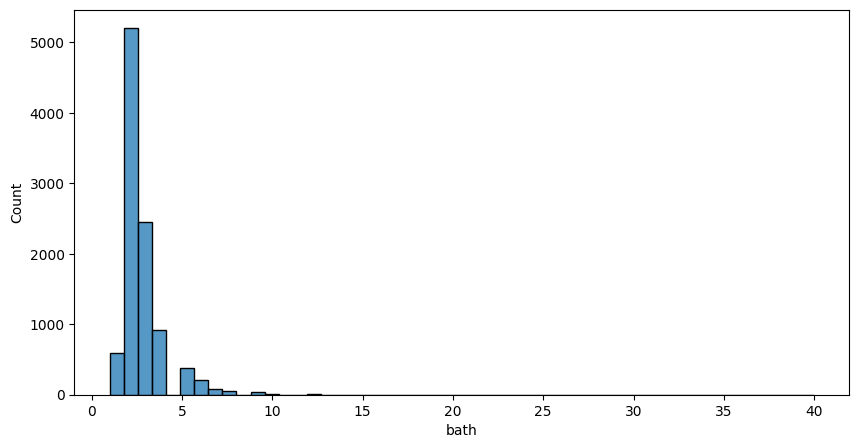

In [256]:
sns.histplot(data =df["bath"],bins=50)

In [257]:
df["balcony"].value_counts()

balcony
2.0    3807
1.0    3674
3.0    1265
0.0     784
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

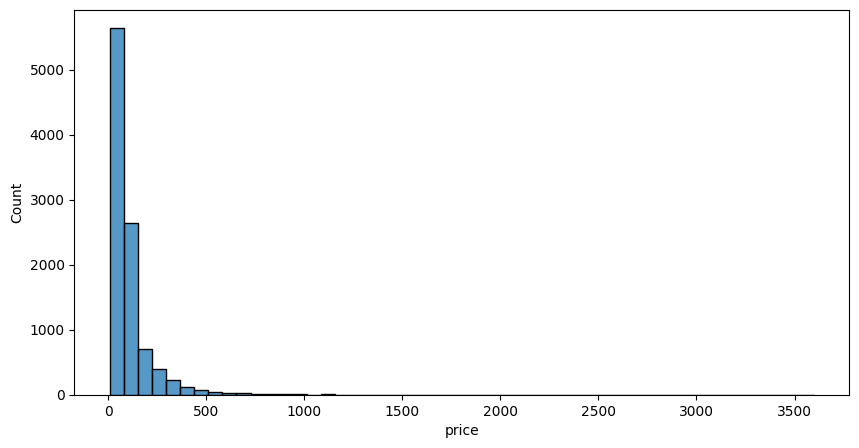

In [258]:
sns.histplot(data=df["price"],bins=50)

In [259]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              13
society         4107
total_sqft         0
bath              51
balcony          460
price              0
dtype: int64

In [260]:
df_clean= df.copy()

In [261]:
df_clean

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,18-Nov,Channasandra,3 Bedroom,NaN,1200,3.0,1.0,67.77
1,Super built-up Area,Ready To Move,Kothanur,3 BHK,Gilleon,1820,3.0,3.0,77.00
2,Super built-up Area,Ready To Move,Banashankari,2 BHK,NaN,1040,2.0,3.0,45.00
3,Super built-up Area,18-Apr,Electronic City,3 BHK,Prarkun,1599,3.0,2.0,125.00
4,Built-up Area,Ready To Move,Kadugodi,3 BHK,MSingco,1260,2.0,2.0,54.00
...,...,...,...,...,...,...,...,...,...
9985,Built-up Area,Ready To Move,Yelahanka,2 BHK,AdniaSk,1250,2.0,2.0,54.00
9986,Super built-up Area,Ready To Move,Sarjapur Road,3 BHK,SoniaEt,2070,4.0,2.0,160.00
9987,Super built-up Area,18-Apr,Virat Nagar,3 BHK,NaN,1215,2.0,2.0,49.75
9988,Built-up Area,Ready To Move,3rd Block Hrbr Layout,2 BHK,Icncy R,1320,2.0,3.0,90.00


In [262]:
df_clean[pd.isnull(df_clean["size"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
85,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000
653,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
715,Plot Area,Immediate Possession,Yelahanka,NaN,Saaveha,1200 - 1800,NaN,NaN,12.750
1400,Plot Area,Immediate Possession,Carmelaram,NaN,Ocezes,2000,NaN,NaN,120.000
2506,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
2833,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
3607,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
3818,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
5104,Plot Area,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.440
6355,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000


In [263]:
df_clean.dropna(axis=0,thresh=7,inplace=True)

In [264]:
df_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         4104
total_sqft         0
bath              38
balcony          447
price              0
dtype: int64

In [265]:
df_clean[pd.isnull(df_clean["location"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price


In [266]:
df_clean[df_clean["society"] == "Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2718,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [267]:
df_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         4104
total_sqft         0
bath              38
balcony          447
price              0
dtype: int64

In [268]:
df_clean["size"].unique()


array(['3 Bedroom', '3 BHK', '2 BHK', '6 Bedroom', '4 Bedroom', '1 BHK',
       '7 Bedroom', '9 Bedroom', '5 Bedroom', '2 Bedroom', '4 BHK',
       '8 Bedroom', '6 BHK', '5 BHK', '1 Bedroom', '9 BHK', '7 BHK',
       '1 RK', '14 BHK', '12 Bedroom', '10 Bedroom', '11 BHK',
       '11 Bedroom', '43 Bedroom', '10 BHK', '8 BHK', '19 BHK', '16 BHK'],
      dtype=object)

In [269]:

df_clean["bhk"] = df_clean["size"].apply(lambda x: int(x.split(" ")[0]))

In [270]:
df_clean[pd.isnull(df_clean["bath"])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
34,Super built-up Area,Ready To Move,Kanakpura Road,3 BHK,Wiowsri,1430 - 1630,NaN,NaN,70.990,3
417,Super built-up Area,18-Jun,Haralur Road,4 BHK,SNnia E,2805 - 3565,NaN,NaN,175.000,4
694,Built-up Area,Ready To Move,Sarjapur Road,4 Bedroom,AztheBr,3418,NaN,NaN,222.000,4
781,Super built-up Area,18-Mar,JP Nagar,3 BHK,Shestut,1750 - 2640,NaN,NaN,152.000,3
887,Super built-up Area,18-Mar,Sarjapur Road,3 BHK,PualeSk,1618 - 1929,NaN,NaN,102.920,3
932,Super built-up Area,18-Dec,Whitefield,3 BHK,BSlasin,1390 - 1600,NaN,NaN,61.280,3
1310,Super built-up Area,19-May,Sarjapur Road,3 BHK,Klark L,1446 - 1506,NaN,NaN,98.940,3
1329,Super built-up Area,Ready To Move,Malleshwaram,3 BHK,Sariaat,2215 - 2475,NaN,NaN,293.000,3
1341,Built-up Area,18-May,Hennur,3 Bedroom,Asoilul,2264,NaN,NaN,155.000,3
1413,Super built-up Area,22-May,Jakkur,4 BHK,SoineC,2249.81 - 4112.19,NaN,NaN,260.500,4


In [271]:
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

df_clean[~df_clean["total_sqft"].apply(fcnIsFloat)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
31,Built-up Area,Ready To Move,Arekere,9 Bedroom,NaN,4125Perch,9.0,NaN,265.000,9
34,Super built-up Area,Ready To Move,Kanakpura Road,3 BHK,Wiowsri,1430 - 1630,NaN,NaN,70.990,3
206,Built-up Area,Ready To Move,Gowdanapalya,5 BHK,NaN,24Sq. Meter,5.0,0.0,75.000,5
417,Super built-up Area,18-Jun,Haralur Road,4 BHK,SNnia E,2805 - 3565,NaN,NaN,175.000,4
433,Super built-up Area,Ready To Move,Hosur Road,4 BHK,Saageat,2800 - 2870,4.0,0.0,241.000,4
494,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,157.500,4
506,Super built-up Area,Ready To Move,Hebbal,4 BHK,Brium C,4000 - 4450,6.0,0.0,359.000,4
777,Super built-up Area,18-Jun,Old Madras Road,4 BHK,Brica E,3630 - 3800,6.0,0.0,212.500,4
781,Super built-up Area,18-Mar,JP Nagar,3 BHK,Shestut,1750 - 2640,NaN,NaN,152.000,3
811,Super built-up Area,20-Jun,Budigere,2 BHK,Brstaue,1150 - 1194,2.0,0.0,56.725,2


In [272]:
metrics = []

def fcnConvertToSqFt(x, metric):
    if metric == "Acres":
        return x * 43560
    elif metric == "Cents":
        return x * 435.6
    elif metric == "Grounds":
        return x * 2400
    elif metric == "Guntha":
        return x * 1088.98
    elif metric == "Perch":
        return x * 272.25
    elif metric == "Sq. Meter":
        return x * 10.7639
    elif metric == "Sq. Yards":
        return x * 9
    else:
        return np.nan

def fcnExtractTotalSqft(x):
    try:
        values = x.split("-")
        return np.mean(list(map(float, values)))
    except:
        if x == np.nan:
            return np.nan
        else:
            for intIndex in range(len(x)-1, -1, -1):
                if fcnIsFloat(x[0:intIndex]):
                    return fcnConvertToSqFt(float(x[0:intIndex]), x[intIndex:])

In [273]:
df_clean["sqft"] = df_clean["total_sqft"].apply(fcnExtractTotalSqft)

In [274]:
df_clean["sqft"].describe()

count    9.977000e+03
mean     2.011885e+03
std      1.991807e+04
min      5.000000e+00
25%      1.100000e+03
50%      1.277000e+03
75%      1.680000e+03
max      1.306800e+06
Name: sqft, dtype: float64

In [275]:
df_clean.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,sqft
0,Plot Area,18-Nov,Channasandra,3 Bedroom,NaN,1200,3.0,1.0,67.77,3,1200.0
1,Super built-up Area,Ready To Move,Kothanur,3 BHK,Gilleon,1820,3.0,3.0,77.00,3,1820.0
2,Super built-up Area,Ready To Move,Banashankari,2 BHK,NaN,1040,2.0,3.0,45.00,2,1040.0
3,Super built-up Area,18-Apr,Electronic City,3 BHK,Prarkun,1599,3.0,2.0,125.00,3,1599.0
4,Built-up Area,Ready To Move,Kadugodi,3 BHK,MSingco,1260,2.0,2.0,54.00,3,1260.0


In [276]:
df_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         4104
total_sqft         0
bath              38
balcony          447
price              0
bhk                0
sqft               0
dtype: int64

In [277]:
bhk_groupby_bathroom = df_clean.groupby("bhk")["bath"].value_counts()

In [278]:
def fcnFillBathrooms(bhk_groupby_bathroom, row):
    if pd.isnull(row["bath"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["bath"])

In [279]:
bhk_groupby_bathroom = df_clean.groupby("bhk")["bath"].value_counts()
df_clean["bath"] = df_clean.apply(lambda row: fcnFillBathrooms(bhk_groupby_bathroom, row), axis=1)

In [280]:
def fcnFillBalcony(bhk_groupby_balcony, row):
    if pd.isnull(row["balcony"]):
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        return int(row["balcony"])

In [281]:
bhk_groupby_balcony = df_clean.groupby("bhk")["balcony"].value_counts()
df_clean["balcony"] = df_clean.apply(lambda row: fcnFillBalcony(bhk_groupby_balcony, row), axis=1)

In [282]:
df_clean.drop(["society", "size", "total_sqft"], inplace = True, axis=1)

In [283]:
df_clean.isnull().sum()

area_type       0
availability    0
location        0
bath            0
balcony         0
price           0
bhk             0
sqft            0
dtype: int64

In [284]:
df_clean.head()

,area_type,availability,location,bath,balcony,price,bhk,sqft
0,Plot Area,18-Nov,Channasandra,3,1,67.77,3,1200.0
1,Super built-up Area,Ready To Move,Kothanur,3,3,77.00,3,1820.0
2,Super built-up Area,Ready To Move,Banashankari,2,3,45.00,2,1040.0
3,Super built-up Area,18-Apr,Electronic City,3,2,125.00,3,1599.0
4,Built-up Area,Ready To Move,Kadugodi,2,2,54.00,3,1260.0


In [285]:
def fcnRelabelAvailability(x):
    values = x.split("-")
    try:
        if len(values) > 1:
            return "Soon to be Vacated"
        else:
            return x
    except:
            return ""

In [286]:
df_clean["availability"] = df_clean["availability"].apply(fcnRelabelAvailability)

In [287]:
df_clean["location"] = df_clean["location"].apply(lambda x: x.strip())

In [288]:
unique_location_count = df_clean.groupby("location")["location"].agg("count").sort_values(ascending = False)
unique_location_count

location
Whitefield                        428
Sarjapur  Road                    287
Electronic City                   229
Kanakpura Road                    205
Thanisandra                       180
                                 ... 
1st Stage Radha Krishna Layout      1
2nd Block Hbr Layout                1
2nd Block Koramangala               1
2nd phase jp nagar, jp nagar        1
3rd Phase Iti Layout                1
Name: location, Length: 1171, dtype: int64

In [289]:
unique_location_count_10 = unique_location_count[unique_location_count <= 10]

In [290]:
df_clean["location"] = df_clean["location"].apply(lambda x : "Other" if x in unique_location_count_10 else x)


In [291]:
df_clean["location"].nunique()

193

In [292]:
df_clean["price_per_sqft"] = df_clean["price"] * 100000 /df_clean["sqft"]

In [293]:
df_clean["sqft_per_bhk"] = df_clean["sqft"] / df_clean["bhk"]

In [294]:
df_clean.head()

,area_type,availability,location,bath,balcony,price,bhk,sqft,price_per_sqft,sqft_per_bhk
0,Plot Area,Soon to be Vacated,Channasandra,3,1,67.77,3,1200.0,5647.500000,400.000000
1,Super built-up Area,Ready To Move,Kothanur,3,3,77.00,3,1820.0,4230.769231,606.666667
2,Super built-up Area,Ready To Move,Banashankari,2,3,45.00,2,1040.0,4326.923077,520.000000
3,Super built-up Area,Soon to be Vacated,Electronic City,3,2,125.00,3,1599.0,7817.385866,533.000000
4,Built-up Area,Ready To Move,Kadugodi,2,2,54.00,3,1260.0,4285.714286,420.000000


In [295]:

df_clean[df_clean["sqft_per_bhk"] < 300].count()

area_type         565
availability      565
location          565
bath              565
balcony           565
price             565
bhk               565
sqft              565
price_per_sqft    565
sqft_per_bhk      565
dtype: int64

In [296]:
df_clean[df_clean["sqft_per_bhk"] > 1500].count()

area_type         81
availability      81
location          81
bath              81
balcony           81
price             81
bhk               81
sqft              81
price_per_sqft    81
sqft_per_bhk      81
dtype: int64

In [297]:
df_clean = df_clean[~(df_clean["sqft_per_bhk"] < 300)]
df_clean = df_clean[~(df_clean["sqft_per_bhk"] > 1200)]

/tmp/ipykernel_11138/3474517549.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean["sqft_per_bhk"], hist=True, kde=True,


<Axes: xlabel='sqft_per_bhk', ylabel='Density'>

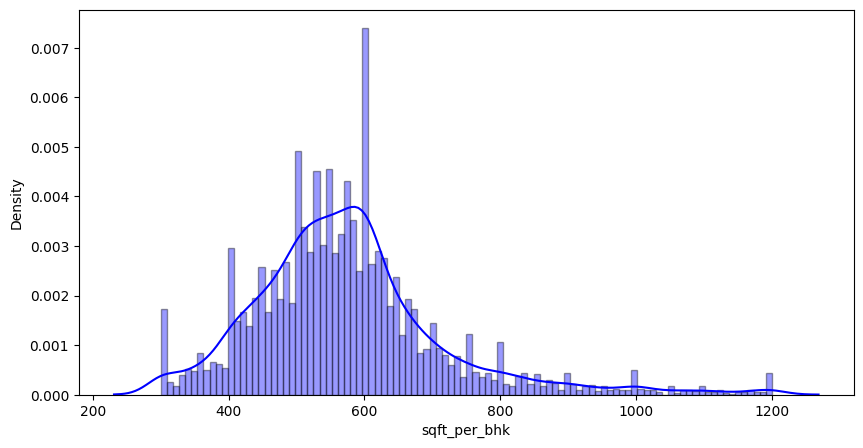

In [298]:
sns.distplot(df_clean["sqft_per_bhk"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [299]:
df_clean = df_clean[~(df_clean["sqft"] > 6000)]

/tmp/ipykernel_11138/3796270418.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean["sqft"], hist=True, kde=True,


<Axes: xlabel='sqft', ylabel='Density'>

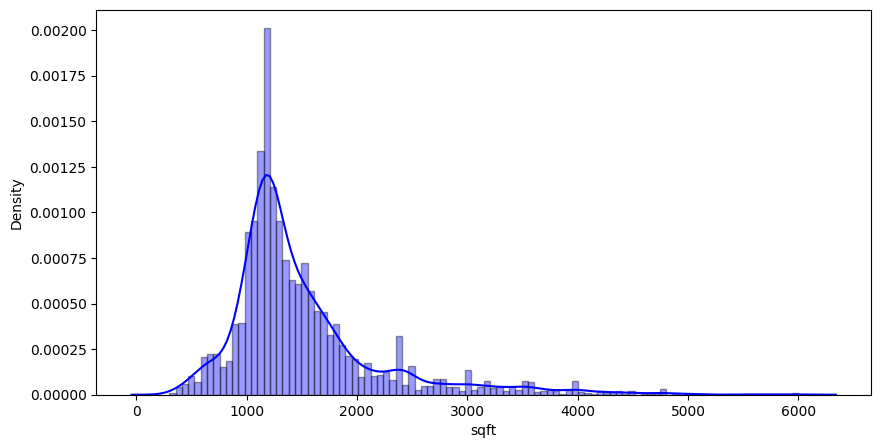

In [300]:
sns.distplot(df_clean["sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

/tmp/ipykernel_11138/88826505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean["price_per_sqft"], hist=True, kde=True,


<Axes: xlabel='price_per_sqft', ylabel='Density'>

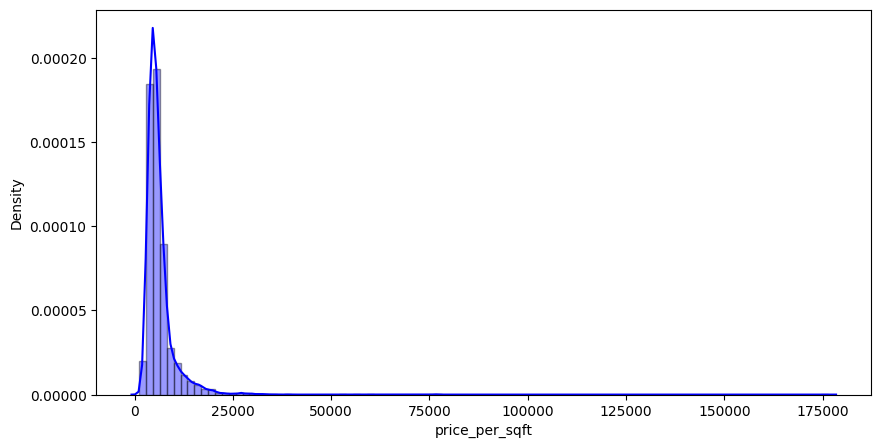

In [301]:
sns.distplot(df_clean["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [302]:
df_clean.sort_values(["price"], ascending=False)

,area_type,availability,location,bath,balcony,price,bhk,sqft,price_per_sqft,sqft_per_bhk
4145,Plot Area,Ready To Move,Other,8,4,2600.0,4,4350.0,59770.114943,1087.5
5791,Plot Area,Soon to be Vacated,Other,3,2,2250.0,4,2940.0,76530.612245,735.0
4650,Super built-up Area,Ready To Move,Bannerghatta Road,4,5,1400.0,5,2500.0,56000.000000,500.0
7816,Plot Area,Ready To Move,Indira Nagar,5,4,1250.0,4,2400.0,52083.333333,600.0
6462,Plot Area,Ready To Move,Other,7,1,1200.0,9,4050.0,29629.629630,450.0
...,...,...,...,...,...,...,...,...,...,...
9121,Built-up Area,Soon to be Vacated,Kengeri,1,1,10.0,1,340.0,2941.176471,340.0
5624,Super built-up Area,Ready To Move,Other,2,1,10.0,1,470.0,2127.659574,470.0
5700,Built-up Area,Ready To Move,Attibele,1,1,10.0,1,410.0,2439.024390,410.0
5238,Super built-up Area,Ready To Move,Attibele,1,1,10.0,1,400.0,2500.000000,400.0


In [303]:
df_clean = df_clean[~(df_clean["price_per_sqft"] > 20000)]

/tmp/ipykernel_11138/88826505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean["price_per_sqft"], hist=True, kde=True,


<Axes: xlabel='price_per_sqft', ylabel='Density'>

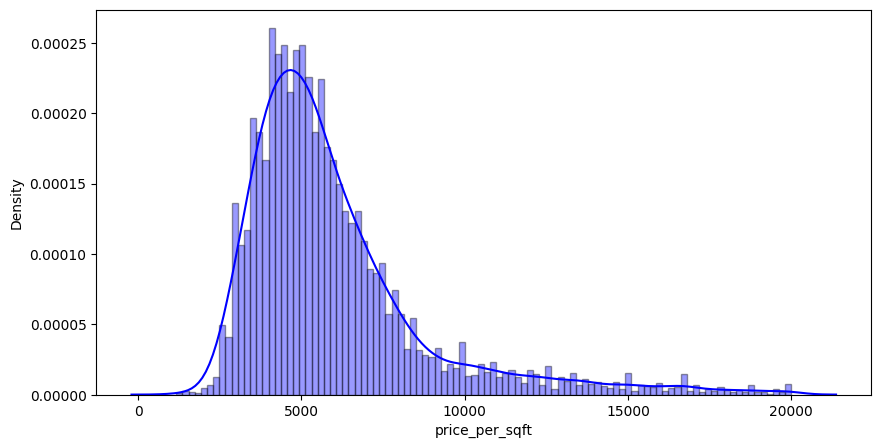

In [304]:
sns.distplot(df_clean["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

/tmp/ipykernel_11138/465135660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clean["price"], hist=True, kde=True,


<Axes: xlabel='price', ylabel='Density'>

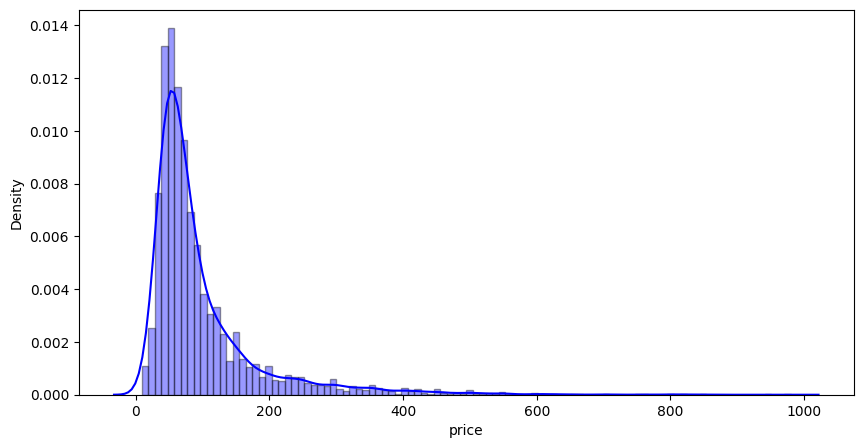

In [305]:
sns.distplot(df_clean["price"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [306]:
df_clean.shape

(9148, 10)

In [307]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [308]:
df_clean = remove_bhk_outliers(df_clean)

In [309]:
df_clean = df_clean[df_clean.bath < df_clean.bhk+2]
df_clean.shape

(6310, 10)

In [310]:
df_clean.corr()["price"].sort_values(ascending=False)

In [311]:
df_clean.drop(["price_per_sqft", "sqft_per_bhk", "balcony"], axis = 1, inplace = True)

In [312]:
price = df_clean["price"]
df_clean.drop(["price"], axis = 1, inplace = True)

In [313]:
df_clean = df_clean[["sqft", "bhk", "bath", "availability", "area_type", "location"]]

In [315]:
le1 = LabelEncoder()
housing_availability = le1.fit_transform(df_clean.iloc[:,3])
le2 = LabelEncoder()
housing_area_type = le2.fit_transform(df_clean.iloc[:,4])
le3 = LabelEncoder()
housing_location = le3.fit_transform(df_clean.iloc[:,5])
ohe1 = OneHotEncoder()
housing_availability = ohe1.fit_transform(housing_availability.reshape(-1,1))
housing_availability = pd.DataFrame(housing_availability.toarray(), columns=le1.classes_)
ohe2 = OneHotEncoder()
housing_area_type = ohe2.fit_transform(housing_area_type.reshape(-1,1))
housing_area_type = pd.DataFrame(housing_area_type.toarray(), columns=le2.classes_)
ohe3 = OneHotEncoder()
housing_location = ohe3.fit_transform(housing_location.reshape(-1,1))
housing_location = pd.DataFrame(housing_location.toarray(), columns=le3.classes_)

In [316]:
housing_availability.drop([housing_availability.columns[len(housing_availability.columns)-1]], axis=1, inplace = True)
housing_area_type.drop([housing_area_type.columns[len(housing_area_type.columns)-1]], axis=1, inplace = True)
housing_location.drop([housing_location.columns[len(housing_location.columns)-1]], axis=1, inplace = True)
housing_num_features = df_clean.iloc[:, 0:3].reset_index()
housing_num_features.drop(["index"], axis = 1, inplace = True)
std_scaler = StandardScaler()
housing_num_scaled_features = pd.DataFrame(std_scaler.fit_transform(housing_num_features), columns=housing_num_features.columns)
housing_for_model = pd.concat([housing_num_scaled_features, housing_availability, housing_area_type, housing_location], axis=1)
housing_for_model                               

,sqft,bhk,bath,Ready To Move,Built-up Area,Carpet Area,Plot Area,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banaswadi,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Brookefield,Budigere,CV Raman Nagar,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Devarachikkanahalli,Dodda Nekkundi,Doddathoguru,Domlur,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jigani,Judicial Layout,KR Puram,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Munnekollal,Mysore Road,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,OMBR Layout,Old Airport Road,Old Madras Road,Other,Padmanabhanagar,Pai Layout,Panathur,Poorna Pragna Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarjapur,Sarjapur Road,Sector 2 HSR Layout,Seegehalli,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town
0,-0.419282,0.466005,0.508134,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.646627,-0.585297,-0.494156,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [317]:
X, y = housing_for_model.values, price.values
X_train, X_test, y_train, y_test = train_test_split(housing_for_model, price, test_size = 0.2, random_state = 42)


In [324]:
X_train.shape

(5048, 199)

In [325]:
X_test.shape

(1262, 199)

In [320]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor


In [321]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.7819735584828836

In [322]:

ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.7819717058067138

In [323]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.7669169374041271